<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-12-07 07:39:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.8MB/s    in 2.5s    

2025-12-07 07:39:54 (59.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



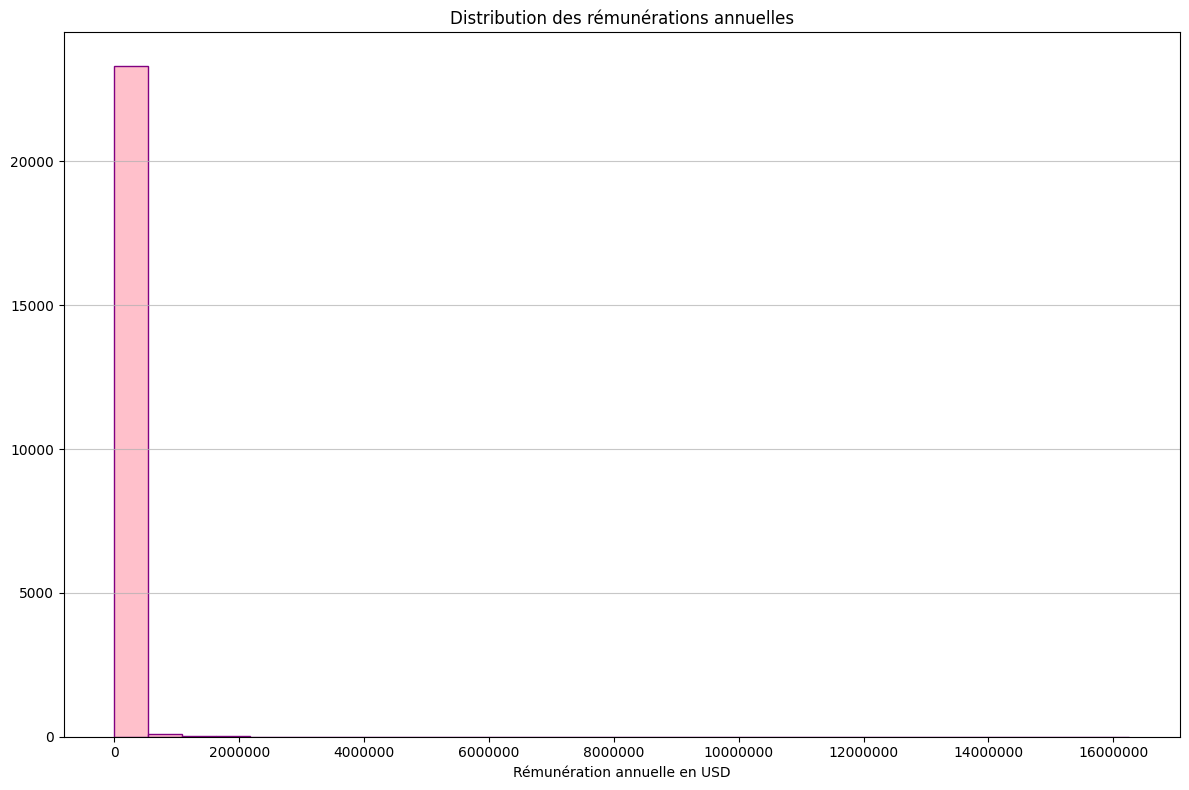

In [5]:
## Write your code here
drop_data = df['ConvertedCompYearly'].dropna()

plt.figure(figsize=(12, 8))
plt.hist(drop_data, color='pink', bins=30, edgecolor='purple')
plt.title('Distribution des rémunérations annuelles')
plt.xlabel('Rémunération annuelle en USD')

plt.grid(axis='y', alpha=0.7)
# Forcer l'affichage du format numérique simple sur l'axe X (éviter la notation scientifique)
plt.ticklabel_format(style='plain', axis='x') 
plt.tight_layout()

plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



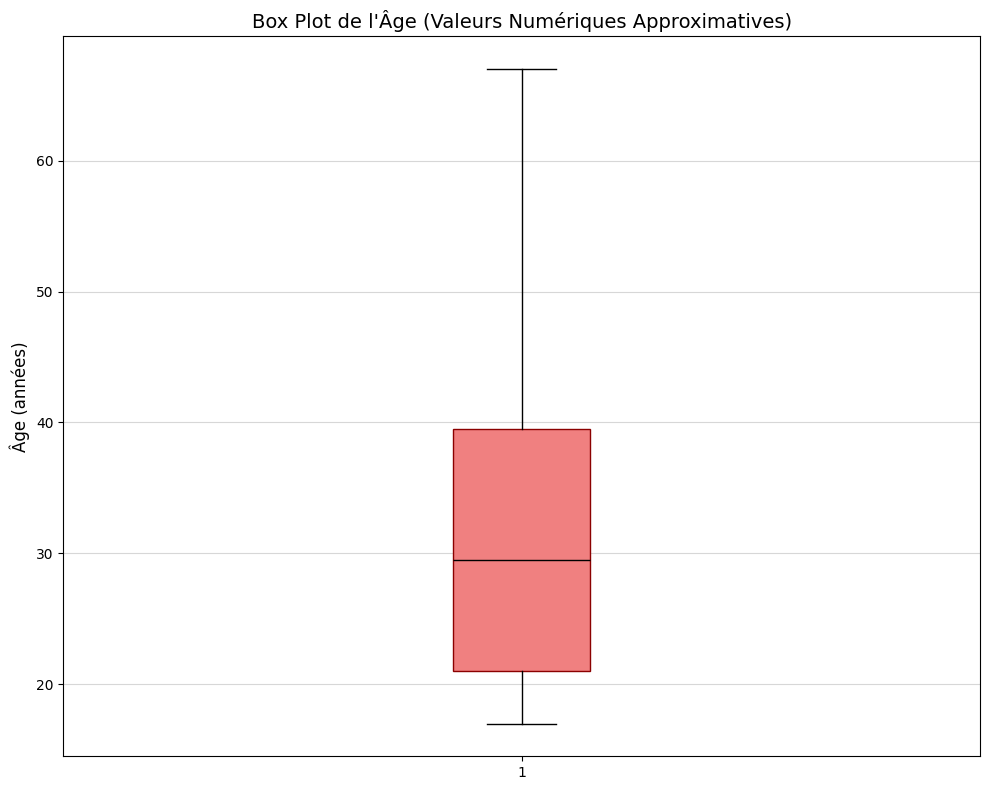

In [10]:
## Write your code here
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67
}
df['Age_Numeric'] = df['Age'].map(age_map)
age_data = df['Age_Numeric'].dropna()

plt.figure(figsize=(10, 8))
plt.boxplot(age_data, patch_artist=True, vert=True, 
            boxprops=dict(facecolor='lightcoral', color='darkred'),
            medianprops=dict(color='black'))

plt.title('Box Plot de l\'Âge (Valeurs Numériques Approximatives)', fontsize=14)
plt.ylabel('Âge (années)', fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



<Figure size 1000x800 with 0 Axes>

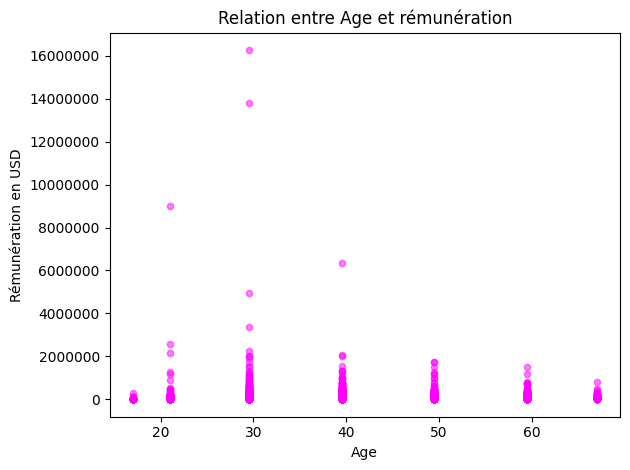

In [11]:
## Write your code here
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67
}
df['Age_Numeric'] = df['Age'].map(age_map)
df_drop_data = df.dropna(subset=['Age_Numeric', 'ConvertedCompYearly'])

plt.figure(figsize=(10, 8))
df_drop_data.plot(kind='scatter',
                  x='Age_Numeric',
                  y='ConvertedCompYearly',
                  alpha=0.5, 
                  color='magenta')
plt.title('Relation entre Age et rémunération')
plt.xlabel('Age')
plt.ylabel('Rémunération en USD')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


/tmp/ipykernel_5187/4277642809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bubble['Bubble_Size'] = (df_bubble['Age_Numeric'] / df_bubble['Age_Numeric'].min()) * size_scale


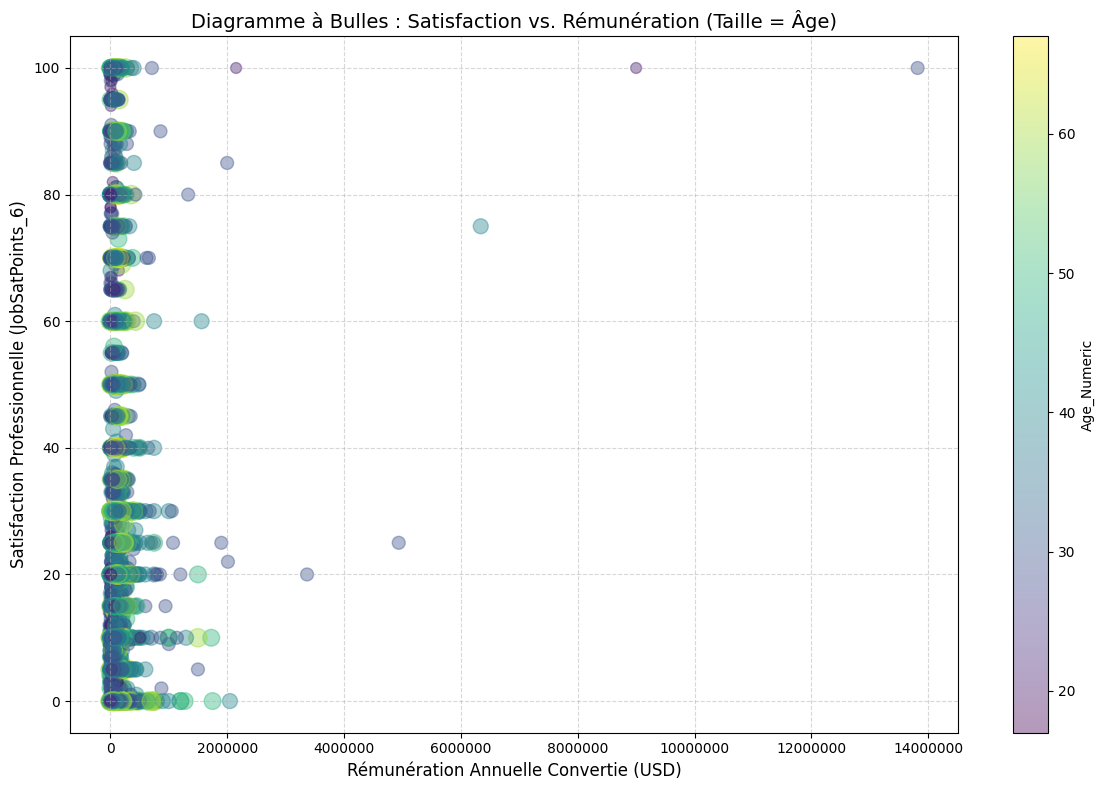

In [14]:

df_bubble = df.dropna(subset=['Age_Numeric', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Ajuster l'échelle de la taille des bulles (pour la rendre visible, nous mettons au carré et ajustons)
# Nous utilisons une petite échelle pour la visualisation, car la taille est relative.
size_scale = 50 
df_bubble['Bubble_Size'] = (df_bubble['Age_Numeric'] / df_bubble['Age_Numeric'].min()) * size_scale 

# 3. CRÉATION DU DIAGRAMME À BULLES
plt.figure(figsize=(12, 8))

# Tracer le graphique (utilisation de l'API Matplotlib de Pandas)
df_bubble.plot(kind='scatter',
                x='ConvertedCompYearly',
                y='JobSatPoints_6',
                s='Bubble_Size', # Utilisation de la colonne de taille mise à l'échelle
                ax=plt.gca(),
                alpha=0.4,
                c='Age_Numeric', # Colorer les bulles par l'âge pour plus de clarté
                cmap='viridis', # Palette de couleurs
                colorbar=True)

# Titres et étiquettes
plt.title('Diagramme à Bulles : Satisfaction vs. Rémunération (Taille = Âge)', fontsize=14)
plt.xlabel('Rémunération Annuelle Convertie (USD)', fontsize=12)
plt.ylabel('Satisfaction Professionnelle (JobSatPoints_6)', fontsize=12)

# Amélioration de la lisibilité
plt.grid(True, linestyle='--', alpha=0.5)
plt.ticklabel_format(style='plain', axis='x') 
plt.tight_layout()

plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



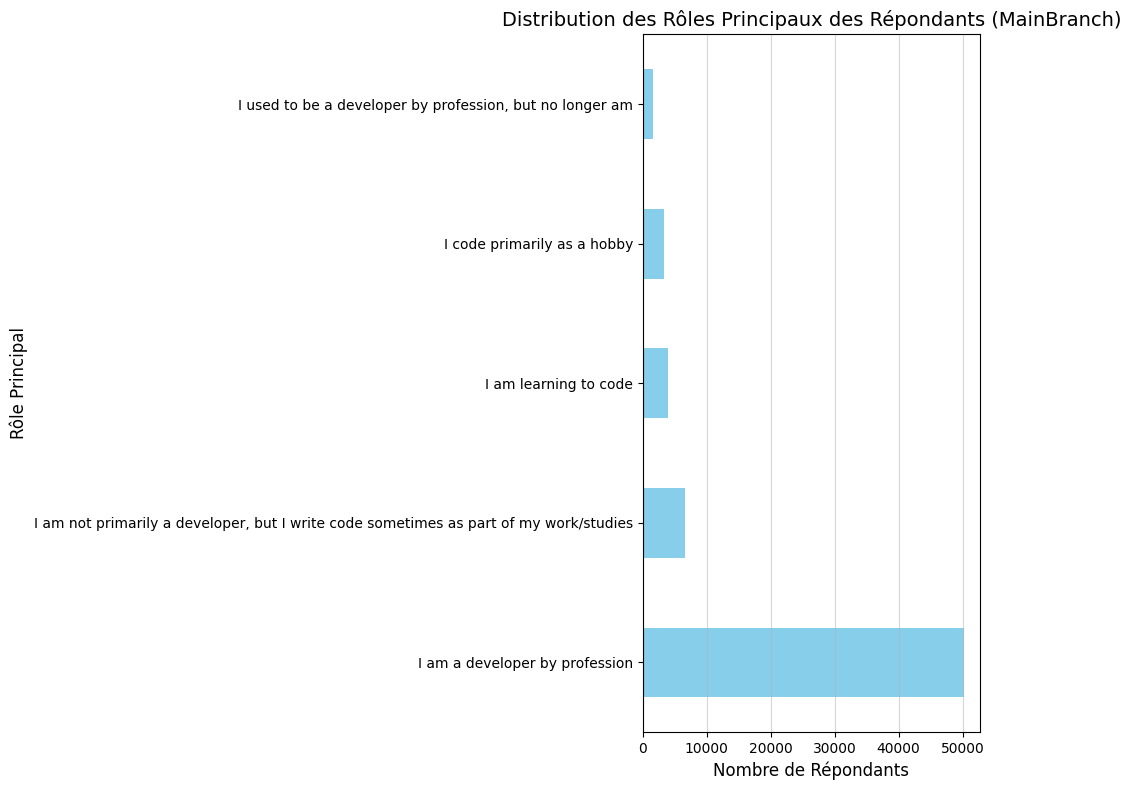

In [15]:
## Write your code here
df_drop = df['MainBranch'].dropna()
main_branch_counts = df['MainBranch'].value_counts() 

plt.figure(figsize=(10, 8))

main_branch_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution des Rôles Principaux des Répondants (MainBranch)', fontsize=14)
plt.xlabel('Nombre de Répondants', fontsize=12)
plt.ylabel('Rôle Principal', fontsize=12)

plt.grid(axis='x', alpha=0.5)
plt.tight_layout()

plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



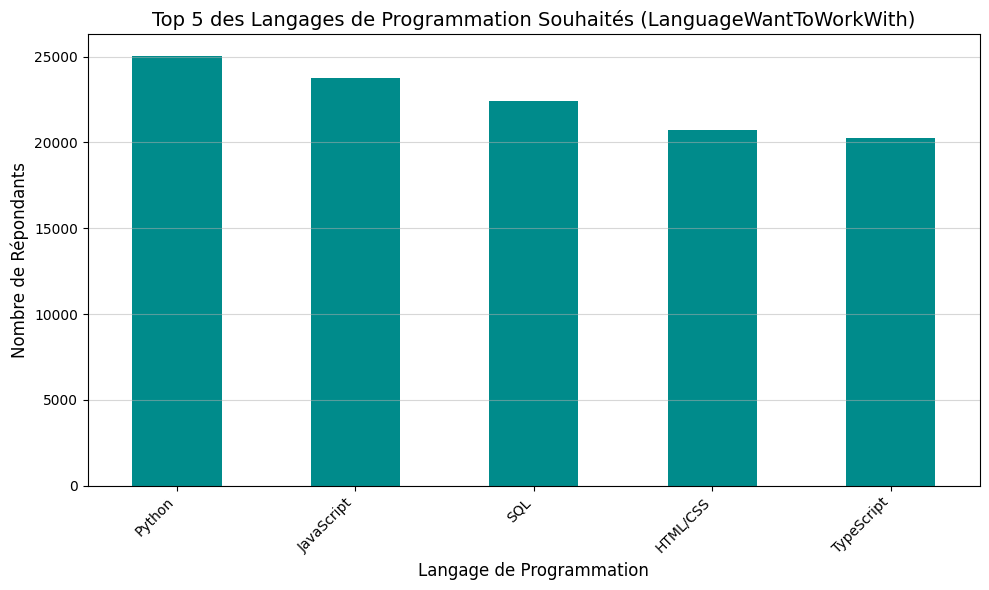

In [18]:
language_counts = df['LanguageWantToWorkWith'].str.split(';', expand=True).stack().value_counts()

top_5_languages = language_counts.head(5)

plt.figure(figsize=(10, 6))

top_5_languages.plot(kind='bar', color='darkcyan')
plt.title('Top 5 des Langages de Programmation Souhaités (LanguageWantToWorkWith)', fontsize=14)
plt.xlabel('Langage de Programmation', fontsize=12)
plt.ylabel('Nombre de Répondants', fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


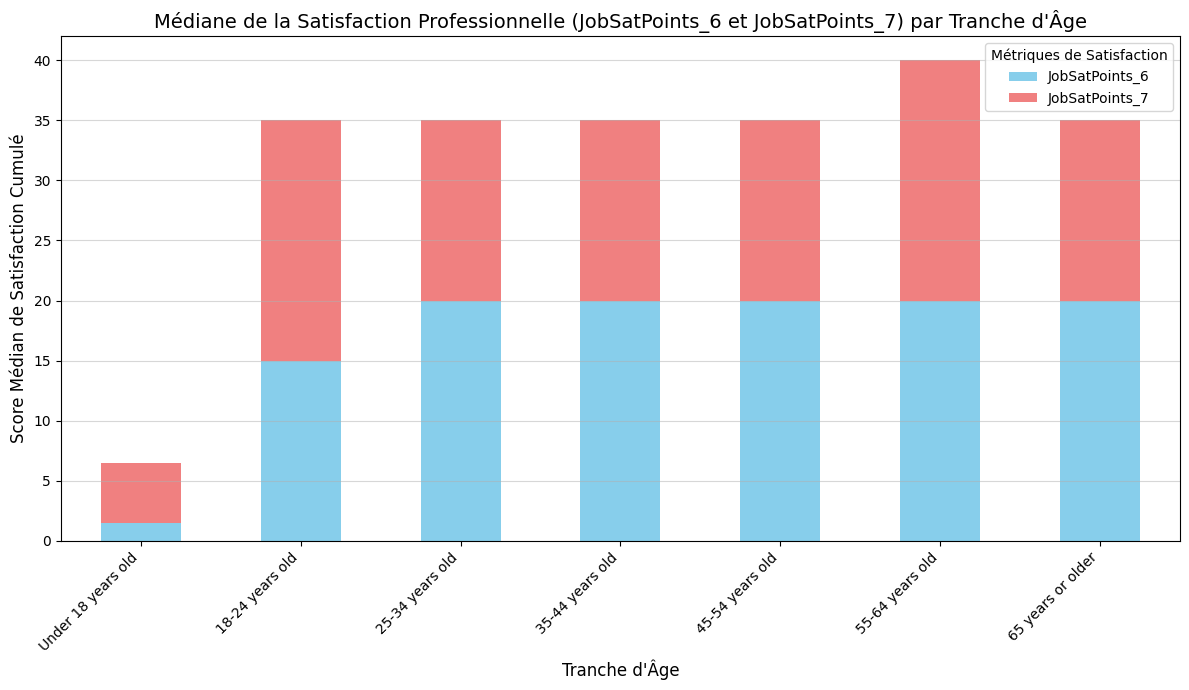

In [19]:
ordered_age_groups = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

df_filtered = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

median_job_sat_by_age = df_filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()
median_job_sat_by_age = median_job_sat_by_age.reindex(ordered_age_groups)

plt.figure(figsize=(12, 7))

median_job_sat_by_age.plot(kind='bar', 
                           stacked=True, 
                           ax=plt.gca(), 
                           color=['skyblue', 'lightcoral'])
plt.title('Médiane de la Satisfaction Professionnelle (JobSatPoints_6 et JobSatPoints_7) par Tranche d\'Âge', fontsize=14)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Score Médian de Satisfaction Cumulé', fontsize=12)

plt.legend(title='Métriques de Satisfaction')
plt.grid(axis='y', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



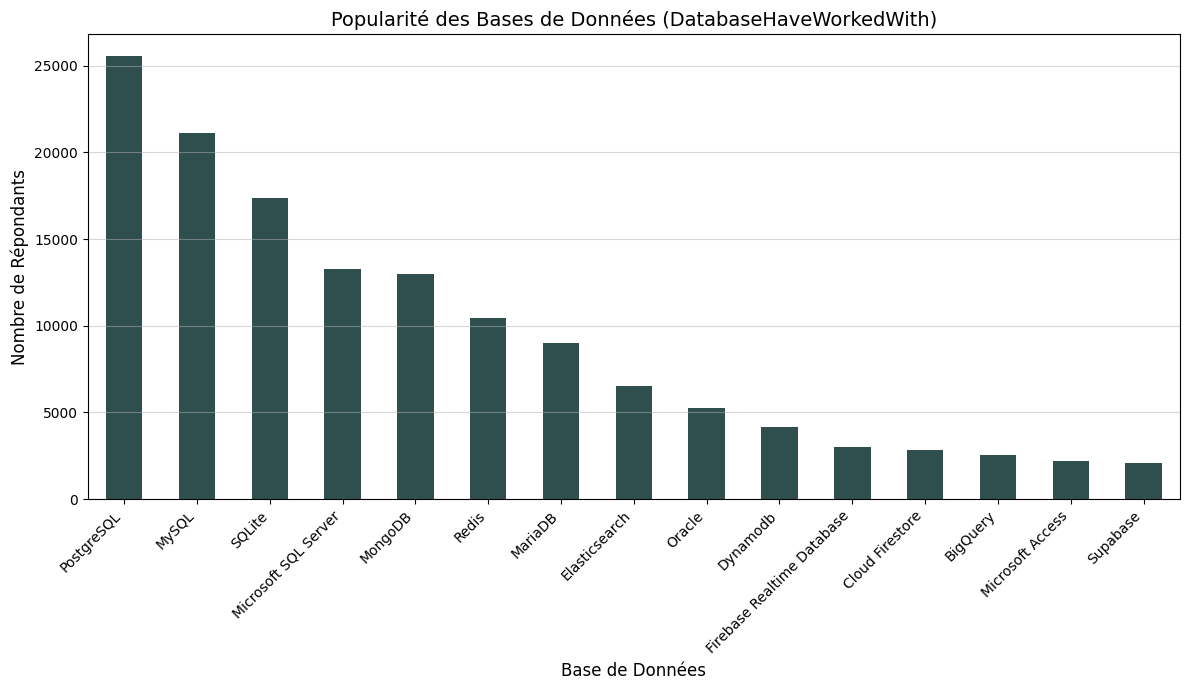

In [20]:

database_counts = df['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()

plt.figure(figsize=(12, 7))

database_counts.head(15).plot(kind='bar', color='darkslategray')
plt.title('Popularité des Bases de Données (DatabaseHaveWorkedWith)', fontsize=14)
plt.xlabel('Base de Données', fontsize=12)
plt.ylabel('Nombre de Répondants', fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



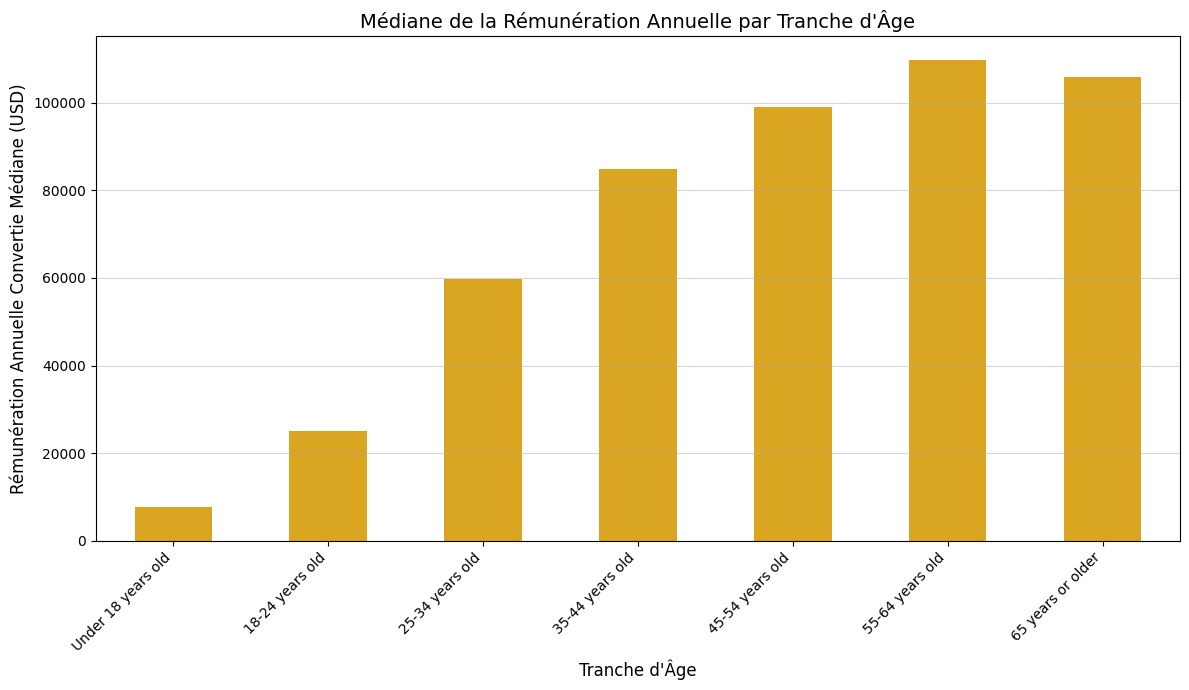

In [21]:
ordered_age_groups = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly'])
df_filtered = df_filtered[df_filtered['Age'].isin(ordered_age_groups)]

median_comp_by_age = df_filtered.groupby('Age')['ConvertedCompYearly'].median().reset_index()

median_comp_by_age['Age'] = pd.Categorical(
    median_comp_by_age['Age'], 
    categories=ordered_age_groups, 
    ordered=True
)
median_comp_by_age = median_comp_by_age.sort_values('Age')

plt.figure(figsize=(12, 7))

median_comp_by_age.plot(kind='bar', 
                        x='Age', 
                        y='ConvertedCompYearly', 
                        ax=plt.gca(), 
                        legend=False, 
                        color='goldenrod')
plt.title('Médiane de la Rémunération Annuelle par Tranche d\'Âge', fontsize=14)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Rémunération Annuelle Convertie Médiane (USD)', fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
